In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

### Basic Computer Vision

In [32]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

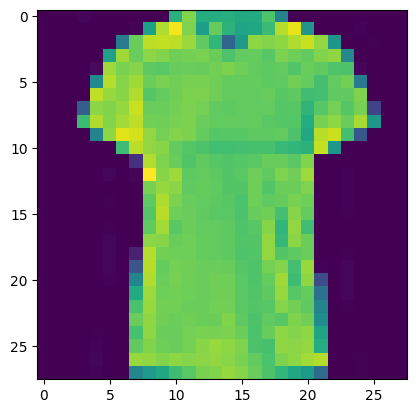

In [33]:
image=training_images[66]
plt.imshow(image)
plt.show()

label=training_labels[66]

In [34]:
## normalizing the data
training_images=training_images/255
test_images=test_images/255

In [35]:
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28,28)), ## input layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.softmax), ## output layer
    ]

)

In [36]:

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)


In [37]:
model.compile(optimizer=tf._optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy'] )

model.fit(training_images,training_labels, epochs=15,callbacks =early_stop)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7577 - loss: 0.7587
Epoch 2/15
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 4:58 159ms/step - accuracy: 0.8438 - loss: 0.2980

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8549 - loss: 0.4013
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8731 - loss: 0.3506
Epoch 4/15
1119/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8829 - loss: 0.3236

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_images, test_labels)

### Now CNN

In [42]:
## CNN Model

model_cnn = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28,28,1)), ## input layer ## 1 byte for color
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(), ## smaller in size

        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.softmax), ## output layer
    ]

)

(<Conv2D name=conv2d_4, built=False>,)

In [43]:
model_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 777,026 (2.96 MB)

 Trainable params: 259,008 (1011.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 518,018 (1.98 MB)

In [43]:
model_cnn.compile(optimizer=tf._optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics= ['accuracy'] )

model_cnn.fit(training_images,training_labels, epochs=15, callbacks=early_stop)


In [44]:
model_cnn.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9096 - loss: 0.5273


[0.49502190947532654, 0.9092000126838684]

True Label: 0
